### conceito

O **K-Means** é um algoritmo de clusterização particional, o que quer dizer que divide os dados em grupos onde os dados são similares entre si e diferem dos outros grupos. Funciona realocando os centróides (posição média dos dados) dos cluster's de forma iterativa:

    1 - após a escolha do k, o algoritmo define aleatoriamente um centróide para cada cluster (o centróide pode ser um dos pontos);
    2 - calcula-se a distância de todos os pontos para cada centróide;
    3 - cada ponto é associado ao centróide mais próximo;
    4 - a média da posição dos pontos associados ao mesmo centróide é calculada e o centróide é reposicionado para o local que representa a média dos pontos;
    5 - repete-se o cálculo da distância de cada ponto aos centróides;
    6 - a associação de pontos aos centróides e o reposicionamento do centróide são feitos novamente até que não haja mais alterações ou até que o número máximo de iterações definido seja alcançado.
    
Um dos problemas da inicialização dos centróides é que, como os centróides são definidos de forma aleatória, algumas inicializações podem fazer com que o agrupamento não seja o ótimo, trocando os pontos de cluster a depender da posição dos centróides (quando dois centróides são muito próximos, por exemplo). Existe um método de inicialização chamado **K-Means++** em que a ideia é tentar fazer uma escolha dos novos centróides distantes dos centróides já existentes. Calcula-se a distância de cada ponto para os centróides existentes, seleciona a menor distância entre os pontos e o centróide (por exemplo, a distância de um ponto para o centróide 1 é 0.15 e para o centróide 2 é 0.40, então computa a distância 0.15) e escolhe-se o novo centróide aleatoriamente, com base em um cálculo de probabilidade (a probabilidade de um ponto ser o novo centróide é calculada com base na distância desse ponto ao centróide dividida pela soma das distâncias de todos os pontos ao centróide (um ponto que está muito perto do centróide já existente receberá uma probabilidade muito baixa de ser escolhida como o novo centróide)).

A escolha do k pode ser feita com o **elbow method**: Para cada k, calcula-se a distância das coordenadas de cada ponto pertencente ao cluster para o centróide e eleva ao quadrado (WCSS – Within Cluster Sum of Squares). Quanto maior o valor, menos a ver o conjunto de pontos tem com o centróide. A ideia é minimizar a variância dos pontos em relação ao centróide. Onde o gráfico "dobra” está indicado o melhor k.

A **silhueta** é uma métrica que varia entre 0 e 1. Quando maior o valor, melhor. Valores próximos a 1 indicam clusters claros enquanto próximos de 0 implicam que os clusters se sobrepõe. O cálculo é feito por uma relação entre a média intracluster e a média intercluster.

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# carregando e lendo dataset

iris = datasets.load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [3]:
# renomeando colunas

iris.rename(columns = {'sepal length (cm)':'sepal_length',
                             'sepal width (cm)':'sepal_width'}, inplace = True)

In [4]:
# inicializar e rodar algoritmo

kmeans = KMeans(n_clusters = 3, init = 'random')
kmeans.fit(iris)

KMeans(init='random', n_clusters=3)

In [5]:
# seleciona os centróides
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [6]:
# retorna o cluster que foi atribuido a cada variável

labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [7]:
iris['cluster'] = labels
iris.head()

,sepal_length,sepal_width,petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


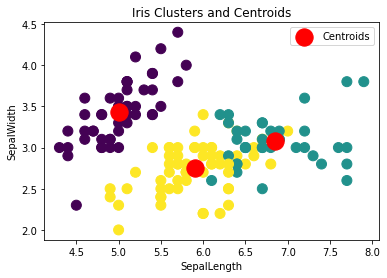

In [8]:
# plot dos dados e dos centróides de cada cluster

plt.scatter(iris.sepal_length, iris.sepal_width, s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Iris Clusters and Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()

plt.show()

O **K-Modes** é uma variação do **K-Means** e é utilizado para dados categóricos, onde o cálculo da média perde sentido. Funciona da mesma forma que o K-Means, mas em vez de usar a média para reposicionar os centróides, utiliza a moda dos dados que pertencem ao cluster.

O **K-Medoids** funciona de forma similar: 

    1 - o algoritmo define aleatoriamente k medóides dentre os pontos do dataset (o medóide é um dos pontos do dataset);
    2 - associa-se cada ponto ao medóide mais próximo;
    3 - calcula-se a dissimilaridade (soma das distâncias entre as coordenadas do ponto e do medóide) entre cada ponto e o medóide e cada ponto é associado ao medóide de menor dissimilaridade;
    4 - calcula-se o 'custo' total, isto é, a soma das dissimilaridades dos pontos para o medóide associado;
    5 - aleatoriamente, define-se outros medóides e calcula-se o custo de associação, até que não existam mais alterações que diminuam o custo.